In [1]:
from importlib import reload
import sys
import os
sys.path.insert(0, './..')
sys.path.insert(0, './../scripts')

In [2]:
from importlib import reload

import pickle

import numpy as np
import tensorflow as tf
import logging
from scipy import linalg

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.axes_grid1 import make_axes_locatable

from plot_func import *

import dev_ori_sel_RF
from dev_ori_sel_RF import data_dir,integrator_tf,dynamics,network,run_onelayer,probe_RFs
from dev_ori_sel_RF.tools import misc,update_params_dict,analysis_tools

2023-04-13 14:24:36.022244: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Please install GPU version of TF


2023-04-13 14:24:43.043349: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
reload(misc)

config_name = "init_gauss"

config_dict = misc.load_external_params("params_"+config_name)
config_dict.update({"config_name" : config_name})

N4 = config_dict["N4"]
Nlgn = config_dict["Nlgn"]
Nret = config_dict["Nret"]
Nlgnpop = 2
N4pop = config_dict["num_lgn_paths"] // Nlgnpop

MISC params_dict params_init_gauss {'Nret': 20, 'Nlgn': 20, 'N4': 20, 'N23': 1, 'Nvert': 1, 'runtime': 4000, 'dt': 0.05, 'tau': 1.0, 'num_lgn_paths': 4, 'gamma_lgn': 4.0, 'gamma_4': 1.0, 'gamma_23': 1.0, 'learning_rate_decay_const': 160000.0, 'saving_stepsize': 10, 'plasticity_rule': 'activity_based', 'random_seed': 19, 'nonlinearity_l4': 'rectifier', 'nonlinearity_l23': 'rectifier', 'integrator': 'Euler', 'test_lowDsubset': False, 'developing_params': [], 'Inp_params': {'ndim': 25, 'radius': 3.0, 'width': 1.0, 'simulate_activity': 'dynamics', 'pattern_duration': 2500, 'avg_no_inp': 1, 'expanse_time': 1, 'init_radius': 0.3, 'mean_width': 0.3, 'onoff_corr_factor': 1.0, 'onoff_rel_weight': 1.0, 'input_type': 'white_noise_online', 'off_bias_strength': 0.0, 'off_bias_region_size': 0.5}, 'Wret_to_lgn_params': {'sigma1': 0.07, 'sigma2': 0.2, 'ampl1': 1.0, 'ampl2': 1.0, 'gamma_ret': 1.0, 'noise': 0.0, 'sigma': 0.045, 'ampl': 1.0, 'profile': 'Gaussian', 'mean_eccentricity': 0.6, 'SD_eccentrici

In [9]:
reload(run_onelayer)
reload(integrator_tf)

config_dict = misc.load_external_params("params_"+config_name)
config_dict.update({"config_name" : config_name})

Version = 0
run_onelayer.parameter_sweep_layer4(Version,config_dict,not_saving_temp=False)

Please install GPU version of TF
MISC params_dict params_init_gauss {'Nret': 20, 'Nlgn': 20, 'N4': 20, 'N23': 1, 'Nvert': 1, 'runtime': 4000, 'dt': 0.05, 'tau': 1.0, 'num_lgn_paths': 4, 'gamma_lgn': 4.0, 'gamma_4': 1.0, 'gamma_23': 1.0, 'learning_rate_decay_const': 160000.0, 'saving_stepsize': 10, 'plasticity_rule': 'activity_based', 'random_seed': 19, 'nonlinearity_l4': 'rectifier', 'nonlinearity_l23': 'rectifier', 'integrator': 'Euler', 'test_lowDsubset': False, 'developing_params': [], 'Inp_params': {'ndim': 25, 'radius': 3.0, 'width': 1.0, 'simulate_activity': 'dynamics', 'pattern_duration': 2500, 'avg_no_inp': 1, 'expanse_time': 1, 'init_radius': 0.3, 'mean_width': 0.3, 'onoff_corr_factor': 1.0, 'onoff_rel_weight': 1.0, 'input_type': 'white_noise_online', 'off_bias_strength': 0.0, 'off_bias_region_size': 0.5}, 'Wret_to_lgn_params': {'sigma1': 0.07, 'sigma2': 0.2, 'ampl1': 1.0, 'ampl2': 1.0, 'gamma_ret': 1.0, 'noise': 0.0, 'sigma': 0.045, 'ampl': 1.0, 'profile': 'Gaussian', 'mean_e

Comment out next line if running with antolik_etal settings
L4 11 48.329662 77.31798 0 0
key dW_lgn_e 11 0.957861 2.3665233
key dW_lgn_i 11 1.0824224 2.2456594
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(5.4381933, shape=(), dtype=float32)

Plasticity step: 12, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 12 51.171257 70.54097 0 0
key dW_lgn_e 12 0.9325681 2.1797056
key dW_lgn_i 12 1.0420035 2.1393874
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(4.0029883, shape=(), dtype=float32)

Plasticity step: 13, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 13 46.576668 72.84915 0 0
key dW_lgn_e 13 0.8749258 2.2110875
key dW_lgn_i 13 1.0139903 2.1353729
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(4.4875584, shape=(), dtype=float32)

Plasticity step: 14, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 14 54.462166 66.68488 0 0
key dW_lgn_e 14 1.077056 2.052

In [10]:
config_dict = misc.load_external_params("params_"+config_name)
config_dict.update({"config_name" : config_name})

config_dict["Wlgn_to4_params"].update({
    "W_mode": "load_from_external",
    "load_from_prev_run" : 0})

reload(run_onelayer)
reload(integrator_tf)
Version = 1
run_onelayer.parameter_sweep_layer4(Version,config_dict,not_saving_temp=False)

MISC params_dict params_init_gauss {'Nret': 20, 'Nlgn': 20, 'N4': 20, 'N23': 1, 'Nvert': 1, 'runtime': 4000, 'dt': 0.05, 'tau': 1.0, 'num_lgn_paths': 4, 'gamma_lgn': 4.0, 'gamma_4': 1.0, 'gamma_23': 1.0, 'learning_rate_decay_const': 160000.0, 'saving_stepsize': 10, 'plasticity_rule': 'activity_based', 'random_seed': 19, 'nonlinearity_l4': 'rectifier', 'nonlinearity_l23': 'rectifier', 'integrator': 'Euler', 'test_lowDsubset': False, 'developing_params': [], 'Inp_params': {'ndim': 25, 'radius': 3.0, 'width': 1.0, 'simulate_activity': 'dynamics', 'pattern_duration': 2500, 'avg_no_inp': 1, 'expanse_time': 1, 'init_radius': 0.3, 'mean_width': 0.3, 'onoff_corr_factor': 1.0, 'onoff_rel_weight': 1.0, 'input_type': 'white_noise_online', 'off_bias_strength': 0.0, 'off_bias_region_size': 0.5}, 'Wret_to_lgn_params': {'sigma1': 0.07, 'sigma2': 0.2, 'ampl1': 1.0, 'ampl2': 1.0, 'gamma_ret': 1.0, 'noise': 0.0, 'sigma': 0.045, 'ampl': 1.0, 'profile': 'Gaussian', 'mean_eccentricity': 0.6, 'SD_eccentrici

L4 11 48.222076 77.48339 0 0
key dW_lgn_e 11 0.9557287 2.371586
key dW_lgn_i 11 1.0809987 2.2489347
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(5.4381933, shape=(), dtype=float32)

Plasticity step: 12, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 12 50.83854 70.700836 0 0
key dW_lgn_e 12 0.9265045 2.1846454
key dW_lgn_i 12 1.0390148 2.1427178
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(4.0029883, shape=(), dtype=float32)

Plasticity step: 13, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 13 46.436245 73.0694 0 0
key dW_lgn_e 13 0.872288 2.2177722
key dW_lgn_i 13 1.0123526 2.138996
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(4.4875584, shape=(), dtype=float32)

Plasticity step: 14, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 14 54.45333 66.607956 0 0
key dW_lgn_e 14 1.0768813 2.0497558
key dW_lgn_i 14 1.1703469 2.0350027
CHECK SHAPE2 (320000,

In [13]:
Version = 1

['W', 'l4']
(2, 2, 20, 20, 20, 20)
(2, 20, 20)
(400, 400)
0.048933253


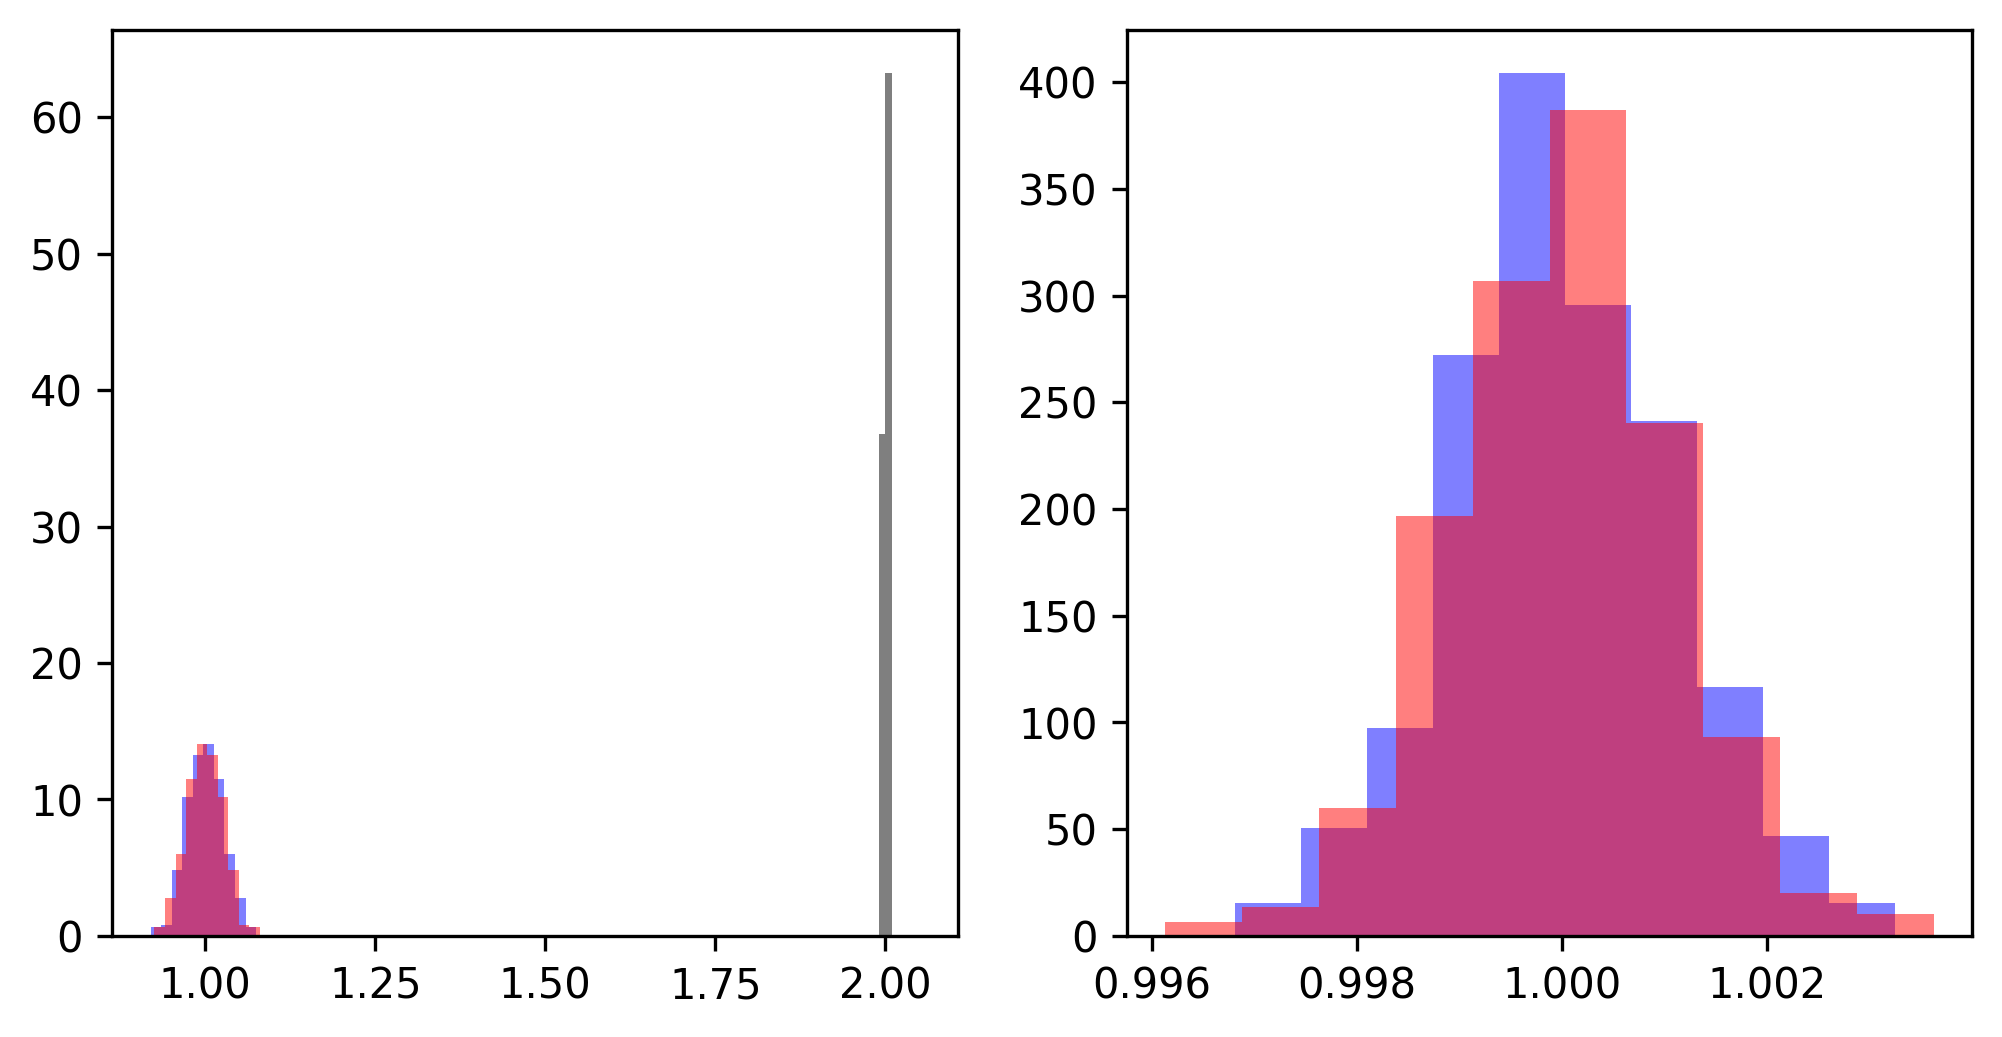

In [11]:
with np.load(data_dir+'/layer4/{s}/v{v}/y_v{v}.npz'.format(s=config_name,v=Version)) as data:
    print(list(data.keys()))
    print(data['W'].reshape(N4pop,Nlgnpop,N4,N4,Nlgn,Nlgn).shape)
    print(data['l4'].reshape(N4pop,N4,N4).shape)
    print(data['W'].reshape(N4pop,Nlgnpop,N4,N4,Nlgn,Nlgn)[0,0].reshape(400,400).shape)
    print(np.max(data['W']))
    
    fig,axs = plt.subplots(1,2,figsize=(8,4),dpi=300)
    fig.subplots_adjust(hspace=.2, wspace=.2)
    
    for i in range(2):
        axs[0].hist(data['W'].reshape(N4pop,Nlgnpop,N4,N4,Nlgn,Nlgn)[0,i].reshape(400,400).sum(1),density=True,
                    color=['b','r'][i],alpha=0.5)
        axs[1].hist(data['W'].reshape(N4pop,Nlgnpop,N4,N4,Nlgn,Nlgn)[0,i].reshape(400,400).sum(0),density=True,
                    color=['b','r'][i],alpha=0.5)
    Wpresum = data['W'].reshape(N4pop,Nlgnpop,N4,N4,Nlgn,Nlgn)[0,:].reshape(2,400,400).sum((0,2))
    axs[0].hist(Wpresum,
                bins=np.linspace(np.min(Wpresum)-0.05,np.max(Wpresum)+0.05,11),density=True,color='k',alpha=0.5)

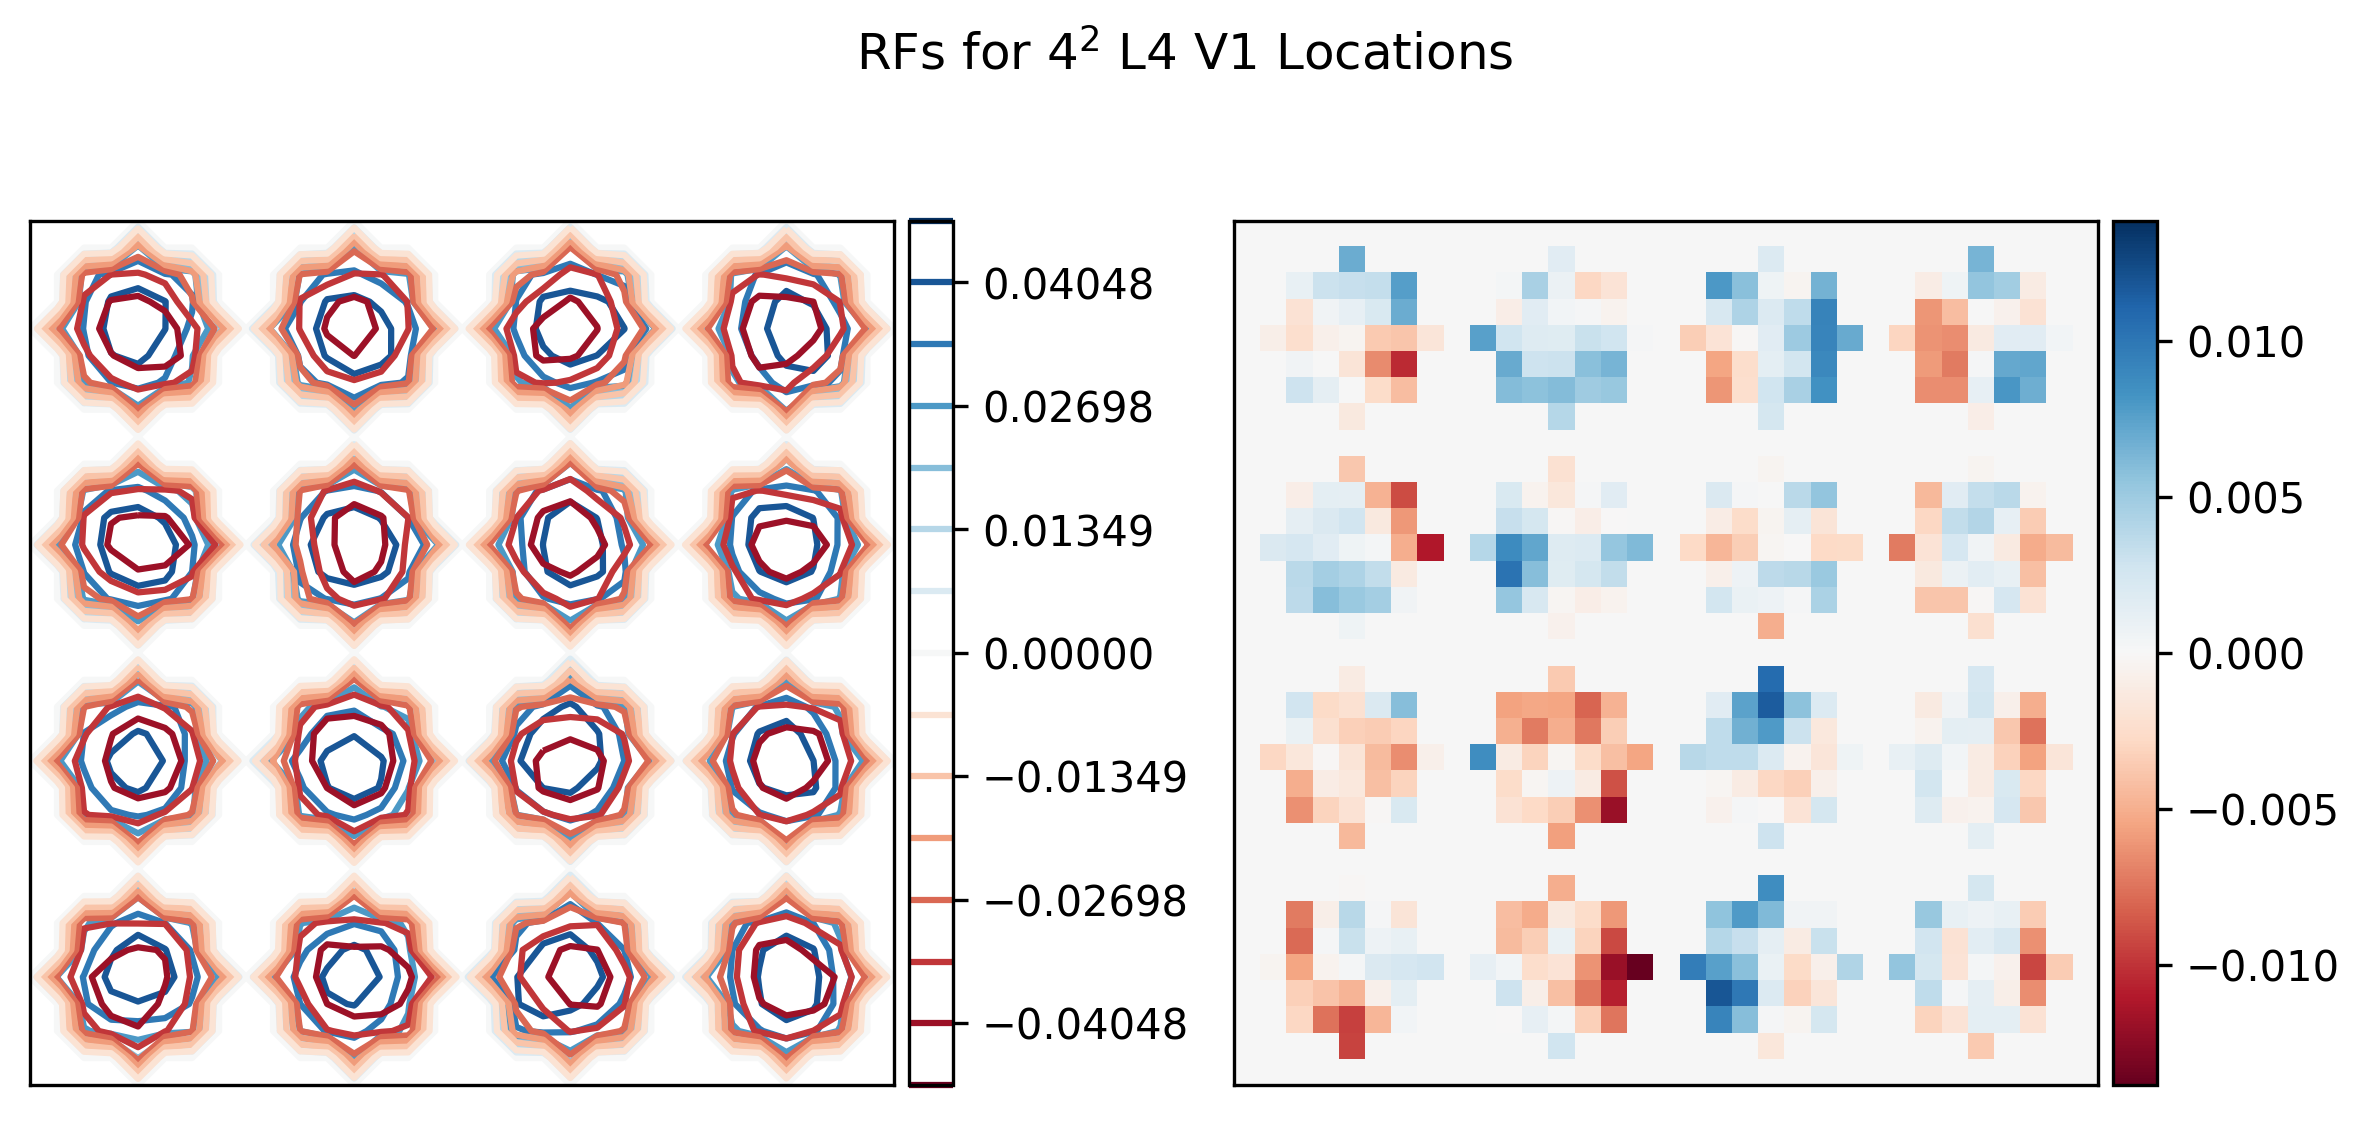

In [13]:
load_location = 'local'
load_path = data_dir + "layer4/{s}/v{v}/".format(s=config_name,v=Version)
probe_config_dict = pickle.load(open(load_path + "config_v{v}.p".format(v=Version),"rb"))
probe_config_dict.update({"config_name" : config_name})
probe_config_dict["Wlgn_to4_params"].update({
    "W_mode": "load_from_external",
    "load_from_prev_run" : Version})
net = network.Network(Version,probe_config_dict,load_location=load_location,verbose=False)

_,Wlgn_to_4,arbor_on,arbor_off,arbor2,_,W4to4 = net.system
rA = int(config_dict["Wlgn_to4_params"]["r_A_on"] * N4)
dA = 2*rA+1

for i in range(20):
    norm = tf.reduce_sum(Wlgn_to_4,axis=(0,2))
    norm = tf.where(tf.equal(norm, 0), tf.ones_like(norm), norm)
    Wlgn_to_4 /= norm[None,:,None]
    norm = tf.reduce_sum(Wlgn_to_4,axis=1)
    norm = tf.where(tf.equal(norm, 0), tf.ones_like(norm), norm)
    Wlgn_to_4 /= norm[:,None,:]
    Wlgn_to_4 = tf.clip_by_value(Wlgn_to_4,0,2*arbor2)
Wlgn_to_4 = np.array(Wlgn_to_4).reshape((2,2,400,400))

idxs = [3,8,14,17]

wff = np.zeros((N4pop,Nlgnpop,len(idxs)*(dA+1)+1,len(idxs)*(dA+1)+1))
for i in range(len(idxs)):
    for j in range(len(idxs)):
        this_wff = Wlgn_to_4.reshape(N4pop,Nlgnpop,N4,N4,Nlgn,Nlgn)[:,:,idxs[i],idxs[j],:,:]
        wff[:,:,1+i*(dA+1):1+i*(dA+1)+dA,1+j*(dA+1):1+j*(dA+1)+dA] =\
               np.roll(this_wff,(rA-idxs[i],rA-idxs[j]),axis=(-2,-1))[:,:,:dA,:dA]
rf = wff[:,0]-wff[:,1]

fig,axs = plt.subplots(1,2,figsize=(8,4),dpi=300)
fig.subplots_adjust(hspace=.1, wspace=.3)
doubcontbar(fig,axs[0],wff[0,0],-wff[0,1],
            cmap='RdBu',levels=np.linspace(-np.max(np.abs(wff[0])),np.max(np.abs(wff[0])),15))
imshowbar(fig,axs[1],rf[0],cmap='RdBu',vmin=-np.max(np.abs(rf[0])),vmax=np.max(np.abs(rf[0])))

fig.suptitle(r'RFs for {:d}$^2$ L4 V1 Locations'.format(len(idxs)))
fig.tight_layout()

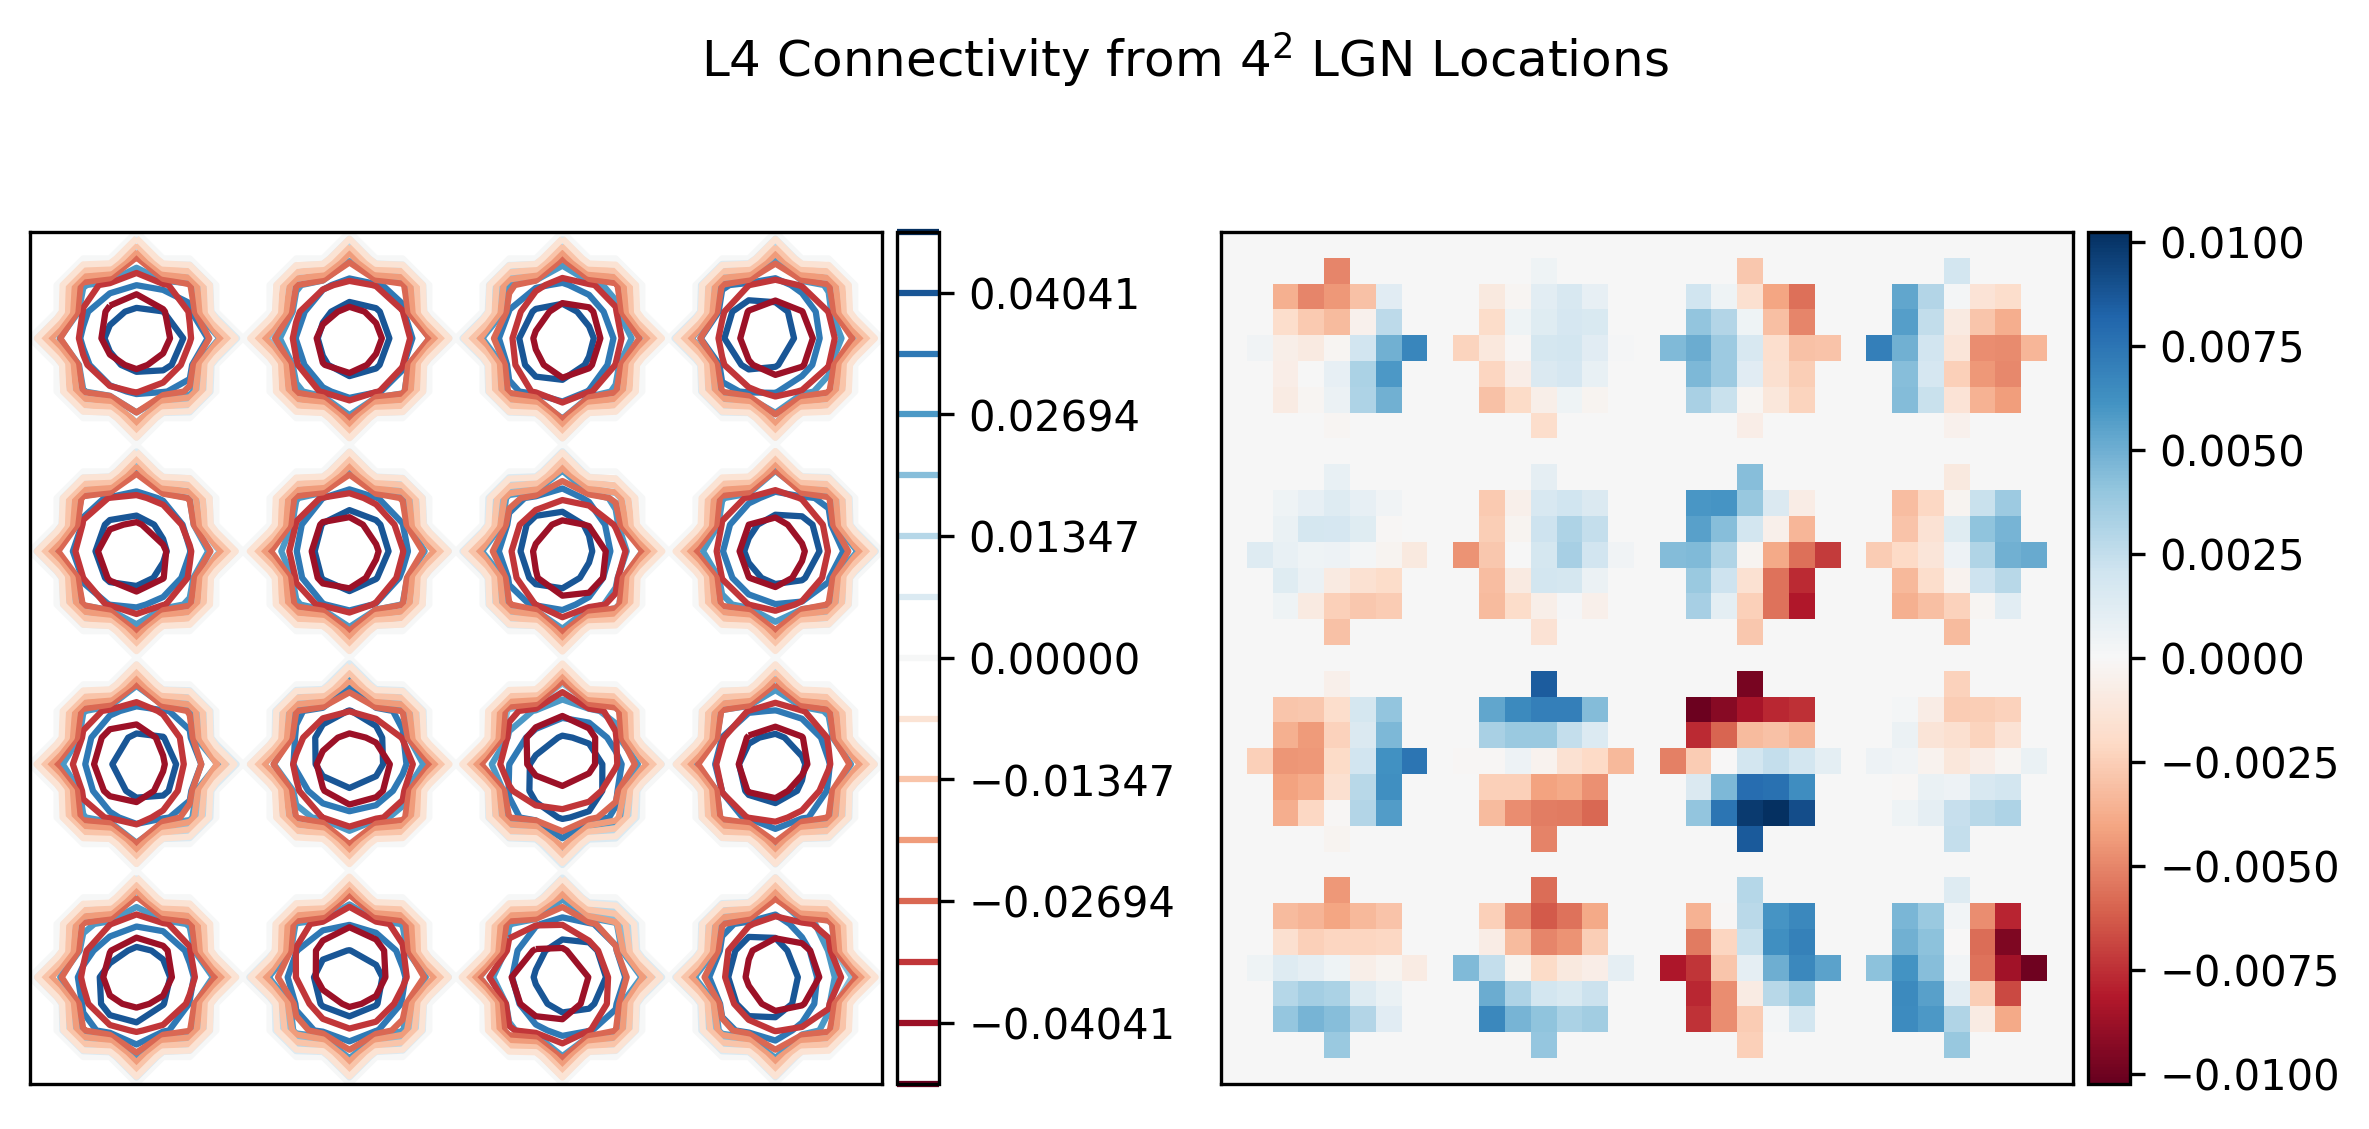

In [14]:
load_location = 'local'
load_path = data_dir + "layer4/{s}/v{v}/".format(s=config_name,v=Version)
probe_config_dict = pickle.load(open(load_path + "config_v{v}.p".format(v=Version),"rb"))
probe_config_dict["Wlgn_to4_params"].update({
    "W_mode": "load_from_external",
    "load_from_prev_run" : Version})
net = network.Network(Version,probe_config_dict,load_location=load_location,verbose=False)

_,Wlgnto4,arbor_on,arbor_off,arbor2,_,W4to4 = net.system
rA = int(config_dict["Wlgn_to4_params"]["r_A_on"] * N4)

idxs = [3,8,14,17]

wff = np.zeros((N4pop,Nlgnpop,len(idxs)*(dA+1)+1,len(idxs)*(dA+1)+1))
for i in range(len(idxs)):
    for j in range(len(idxs)):
        this_wff = Wlgnto4.reshape(N4pop,Nlgnpop,N4,N4,Nlgn,Nlgn)[:,:,:,:,idxs[i],idxs[j]]
        wff[:,:,1+i*(dA+1):1+i*(dA+1)+dA,1+j*(dA+1):1+j*(dA+1)+dA] =\
               np.roll(this_wff,(rA-idxs[i],rA-idxs[j]),axis=(-2,-1))[:,:,:dA,:dA]
rf = wff[:,0]-wff[:,1]

fig,axs = plt.subplots(1,2,figsize=(8,4),dpi=300)
fig.subplots_adjust(hspace=.1, wspace=.3)
doubcontbar(fig,axs[0],wff[0,0],-wff[0,1],
            cmap='RdBu',levels=np.linspace(-np.max(np.abs(wff[0])),np.max(np.abs(wff[0])),15))
imshowbar(fig,axs[1],rf[0],cmap='RdBu',vmin=-np.max(np.abs(rf[0])),vmax=np.max(np.abs(rf[0])))

fig.suptitle(r'L4 Connectivity from {:d}$^2$ LGN Locations'.format(len(idxs)))
fig.tight_layout()

In [16]:
reload(probe_RFs)

net,act,phase = probe_RFs.probe_RFs_one_layer(Version,config_name)

mode in get_RFs load_from_external
 
Load ff connection from version 63
 
profile_conn Gaussian
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)

CHECK CONN VALS Gaussian 0.16206370216865573 0.1634853135911878 0.2004777735523877 0.7074948371359112
orig max ew 2.977428066551318 0.95
max_ew 0.95
WEE=3.6373674721700744,WEI=3.1906732212018207,WIE=3.6692742043820923,WII=3.19067322120182
omega_i=Wie-Wee=0.031906732212017896
omega_e=Wii-Wei=-8.881784197001252e-16

mode in generate_inputs moving_grating_online
lgn (2, 1200, 1, 4, 10)
(2, 3, 400, 4, 10)
(2, 400, 4, 10, 3)
(2, 400, 4, 3, 10)
(2, 400, 3, 4, 10)
Wlgn_to_4 (4, 400, 400) (2, 400, 3, 4, 10)
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 1.4499658401183662 1.4499658401183662
pref_phase 1.4499658401183662 1.4499658401183662
Spat frequency=40, orientation=0 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 0.0 40
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 2.5777170490993173 2.5777170490993173
pref_phase 2.5777170490993173 2.5777170490993173
Spat frequency=40, orientation=45 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 0.7853981633974483 40
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 1.2888585245496587 1.2888585245496587
pref_phase 1.2888585245496587 1.2888585245496587
Spat frequency=40, orientation=90 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 1.5707963267948966 40
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 3.866575573648976 3.866575573648976
pref_phase 3.866575573648976 3.866575573648976
Spat frequency=40, orientation=135 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 2.356194490192345 40
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 1.933287786824488 1.933287786824488
pref_phase 1.933287786824488 1.933287786824488
Spat frequency=60, orientation=0 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 0.0 60
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 1.933287786824488 1.933287786824488
pref_phase 1.933287786824488 1.933287786824488
Spat frequency=60, orientation=45 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 0.7853981633974483 60
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 1.2888585245496587 1.2888585245496587
pref_phase 1.2888585245496587 1.2888585245496587
Spat frequency=60, orientation=90 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 1.5707963267948966 60
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 1.933287786824488 1.933287786824488
pref_phase 1.933287786824488 1.933287786824488
Spat frequency=60, orientation=135 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 2.356194490192345 60
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 2.5777170490993173 2.5777170490993173
pref_phase 2.5777170490993173 2.5777170490993173
Spat frequency=80, orientation=0 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 0.0 80
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 4.5110048359238055 4.5110048359238055
pref_phase 4.5110048359238055 4.5110048359238055
Spat frequency=80, orientation=45 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 0.7853981633974483 80
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 1.2888585245496587 1.2888585245496587
pref_phase 1.2888585245496587 1.2888585245496587
Spat frequency=80, orientation=90 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 1.5707963267948966 80
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 0.6444292622748293 0.6444292622748293
pref_phase 0.6444292622748293 0.6444292622748293
Spat frequency=80, orientation=135 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 2.356194490192345 80


In [10]:
reload(network)

<module 'dev_ori_sel_RF.network' from '/Users/tuannguyen/OrientationSSB/notebooks/./../dev_ori_sel_RF/network.py'>

/Users/tuannguyen/OrientationSSB/notebooks/./../dev_ori_sel_RF/tools/analysis_tools.py:314: RuntimeWarning: invalid value encountered in multiply
  Rn = np.empty((180//delta_bins,N4,N4*Nvert))*np.nan


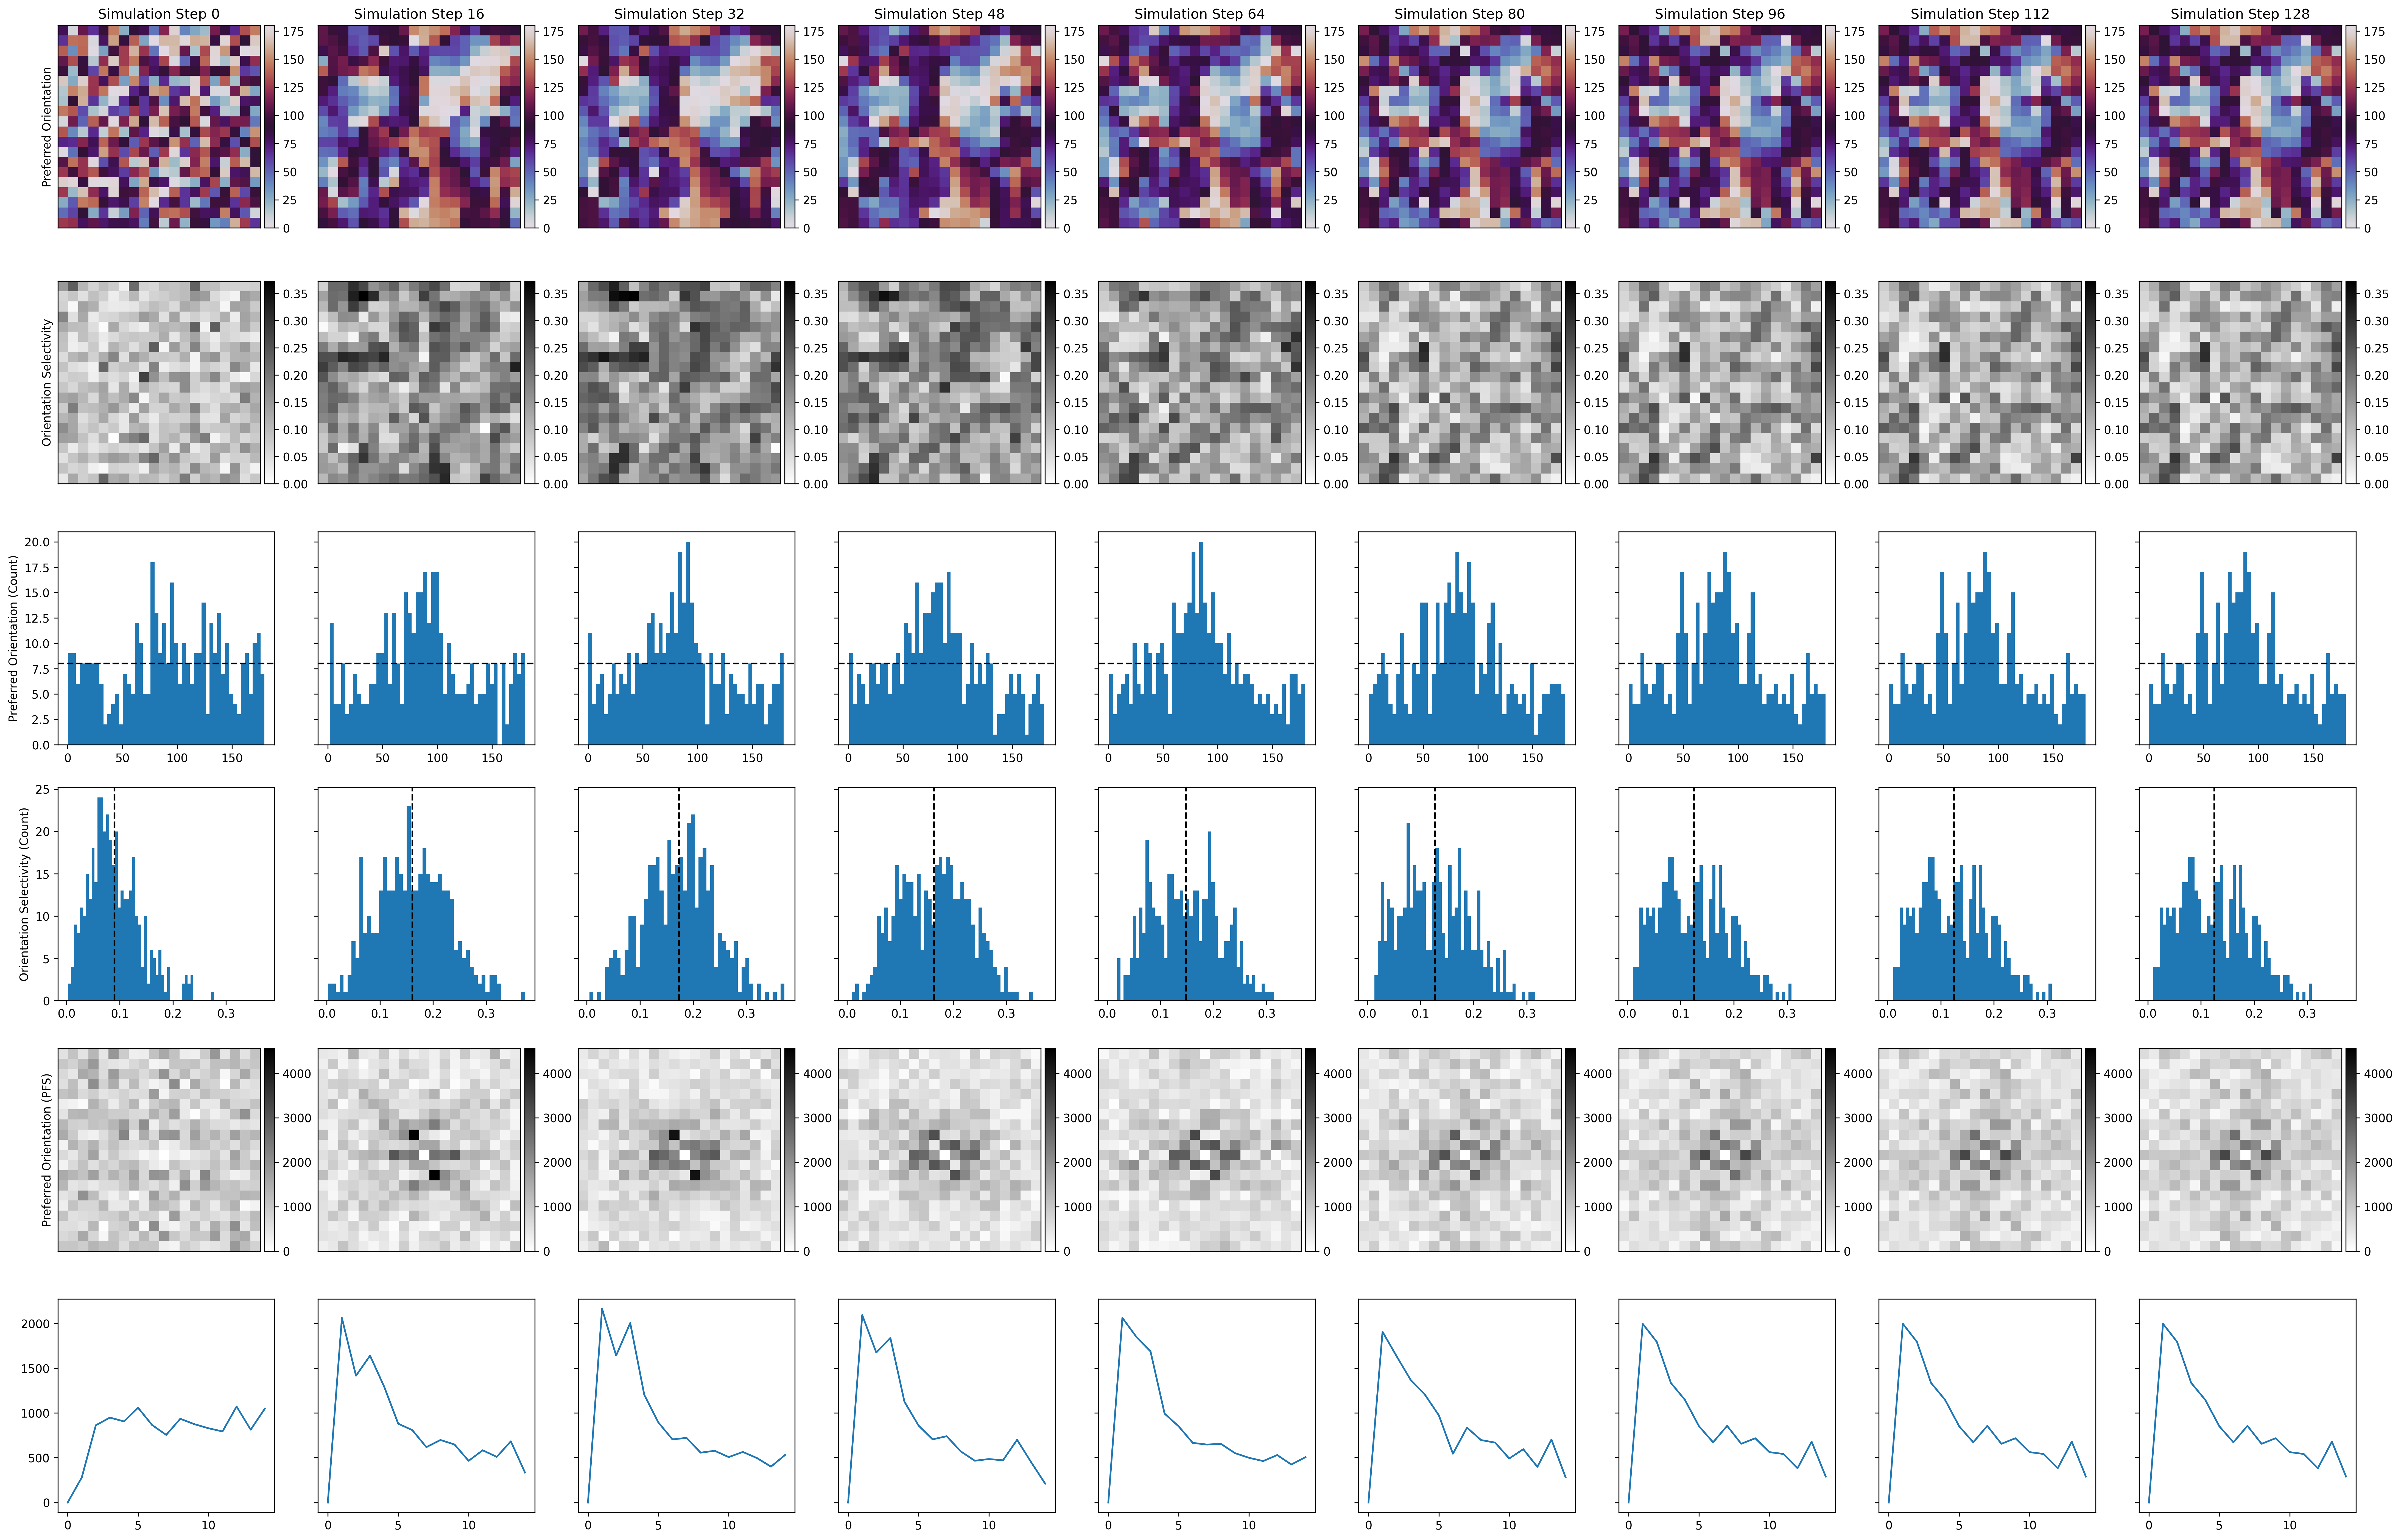

In [11]:
def get_ori_sel(opm,calc_fft=True):
    sel = np.abs(opm)
    ori = np.angle(opm)/2
    ori = ori - (np.sign(ori)-1)*0.5*np.pi
    ori *= 180/np.pi
    
    if calc_fft:
        ori_fft = np.abs(np.fft.fftshift(np.fft.fft2(ori - np.nanmean(ori))))
        ori_fps = np.zeros(int(np.ceil(N4//2*np.sqrt(2))))

        grid = np.arange(-N4//2,N4//2)
        x,y = np.meshgrid(grid,grid)
        bin_idxs = np.digitize(np.sqrt(x**2+y**2),np.arange(0,np.ceil(N4//2*np.sqrt(2)))+0.1)
        for idx in range(0,int(np.ceil(N4//2*np.sqrt(2)))):
            ori_fps[idx] = np.mean(ori_fft[bin_idxs == idx])
        
        return ori,sel,ori_fft,ori_fps
    else:
        return ori,sel

Vers = np.arange(0,128+1,16)-1

oris = np.zeros((len(Vers),N4,N4))
sels = np.zeros((len(Vers),N4,N4))
ori_ffts = np.zeros((len(Vers),N4,N4))
ori_fpss = np.zeros((len(Vers),int(np.ceil(N4//2*np.sqrt(2)))))

for idx,Version in enumerate(Vers):
    if Version == -1:
        probe_config_dict = misc.load_external_params("params_"+config_name,False)
        probe_config_dict.update({
                        "RF_mode" : "initialize",
                        "system" : "one_layer",
                        "Version" : Version,
                        })
        net = network.Network(Version,probe_config_dict,verbose=False)
    else:
        load_location = 'local'
        load_path = data_dir + "layer4/{s}/v{v}/".format(config_name,v=Version)
        probe_config_dict = pickle.load(open(load_path + "config_v{v}.p".format(v=Version),"rb"))
        probe_config_dict["Wlgn_to4_params"].update({
            "W_mode": "load_from_external",
            "load_from_prev_run" : Version})
        net = network.Network(Version,probe_config_dict,load_location=load_location,verbose=False)

    _,Wlgn_to_4,arbor_on,arbor_off,arbor2,_,W4to4 = net.system
#     for i in range(20):
#         norm = tf.reduce_sum(Wlgn_to_4,axis=(0,2))
#         norm = tf.where(tf.equal(norm, 0), tf.ones_like(norm), norm)
#         Wlgn_to_4 /= norm[None,:,None]
#         norm = tf.reduce_sum(Wlgn_to_4,axis=1)
#         norm = tf.where(tf.equal(norm, 0), tf.ones_like(norm), norm)
#         Wlgn_to_4 /= norm[:,None,:]
#         Wlgn_to_4 = tf.clip_by_value(Wlgn_to_4,0,2*arbor2)
    Wlgn_to_4 = np.array(Wlgn_to_4).reshape((2,2,400,400))

    sd = Wlgn_to_4[:,0,...] - Wlgn_to_4[:,1,...]
    sd = sd.reshape((2,20,20,20,20))
    rA = int(config_dict["Wlgn_to4_params"]["r_A_on"] * N4)
    DA = 2*rA + 5
    opm,Rn = analysis_tools.get_response(sd[0],DA)
    
    oris[idx],sels[idx],ori_ffts[idx],ori_fpss[idx] = get_ori_sel(opm)

fig,axs = plt.subplots(6,len(Vers),figsize=(4*len(Vers),4*6),dpi=300,sharex='row',sharey='row')
for i,Version in enumerate(Vers):
    imshowbar(fig,axs[0,i],oris[i],cmap='twilight',vmin=0,vmax=180)
    imshowbar(fig,axs[1,i],sels[i],cmap='binary',vmin=0,vmax=np.max(sels))
    nbin = 50
    axs[2,i].hist(oris[i].flatten(),nbin)
    axs[2,i].axhline(N4*N4/nbin,color='k',ls='--')
    axs[3,i].hist(sels[i].flatten(),nbin)
    axs[3,i].axvline(np.mean(sels[i].flatten()),color='k',ls='--')
    
    imshowbar(fig,axs[4,i],ori_ffts[i],cmap='binary',vmin=0,vmax=np.max(ori_ffts))
    axs[5,i].plot(np.arange(0,np.ceil(N4//2*np.sqrt(2))),ori_fpss[i])
    
    axs[0,i].set_title('Simulation Step {:d}'.format(Version+1))
    
axs[0,0].set_ylabel('Preferred Orientation')
axs[1,0].set_ylabel('Orientation Selectivity')
axs[2,0].set_ylabel('Preferred Orientation (Count)')
axs[3,0].set_ylabel('Orientation Selectivity (Count)')
axs[4,0].set_ylabel('Preferred Orientation (DFT)')
axs[4,0].set_ylabel('Preferred Orientation (PFS)')

plt.savefig("./../plots/Ori_Sel_Dev_FF_Plasticity_"+config_name+".pdf")

Text(0, 0.5, 'Preferred Orientation (PFS)')

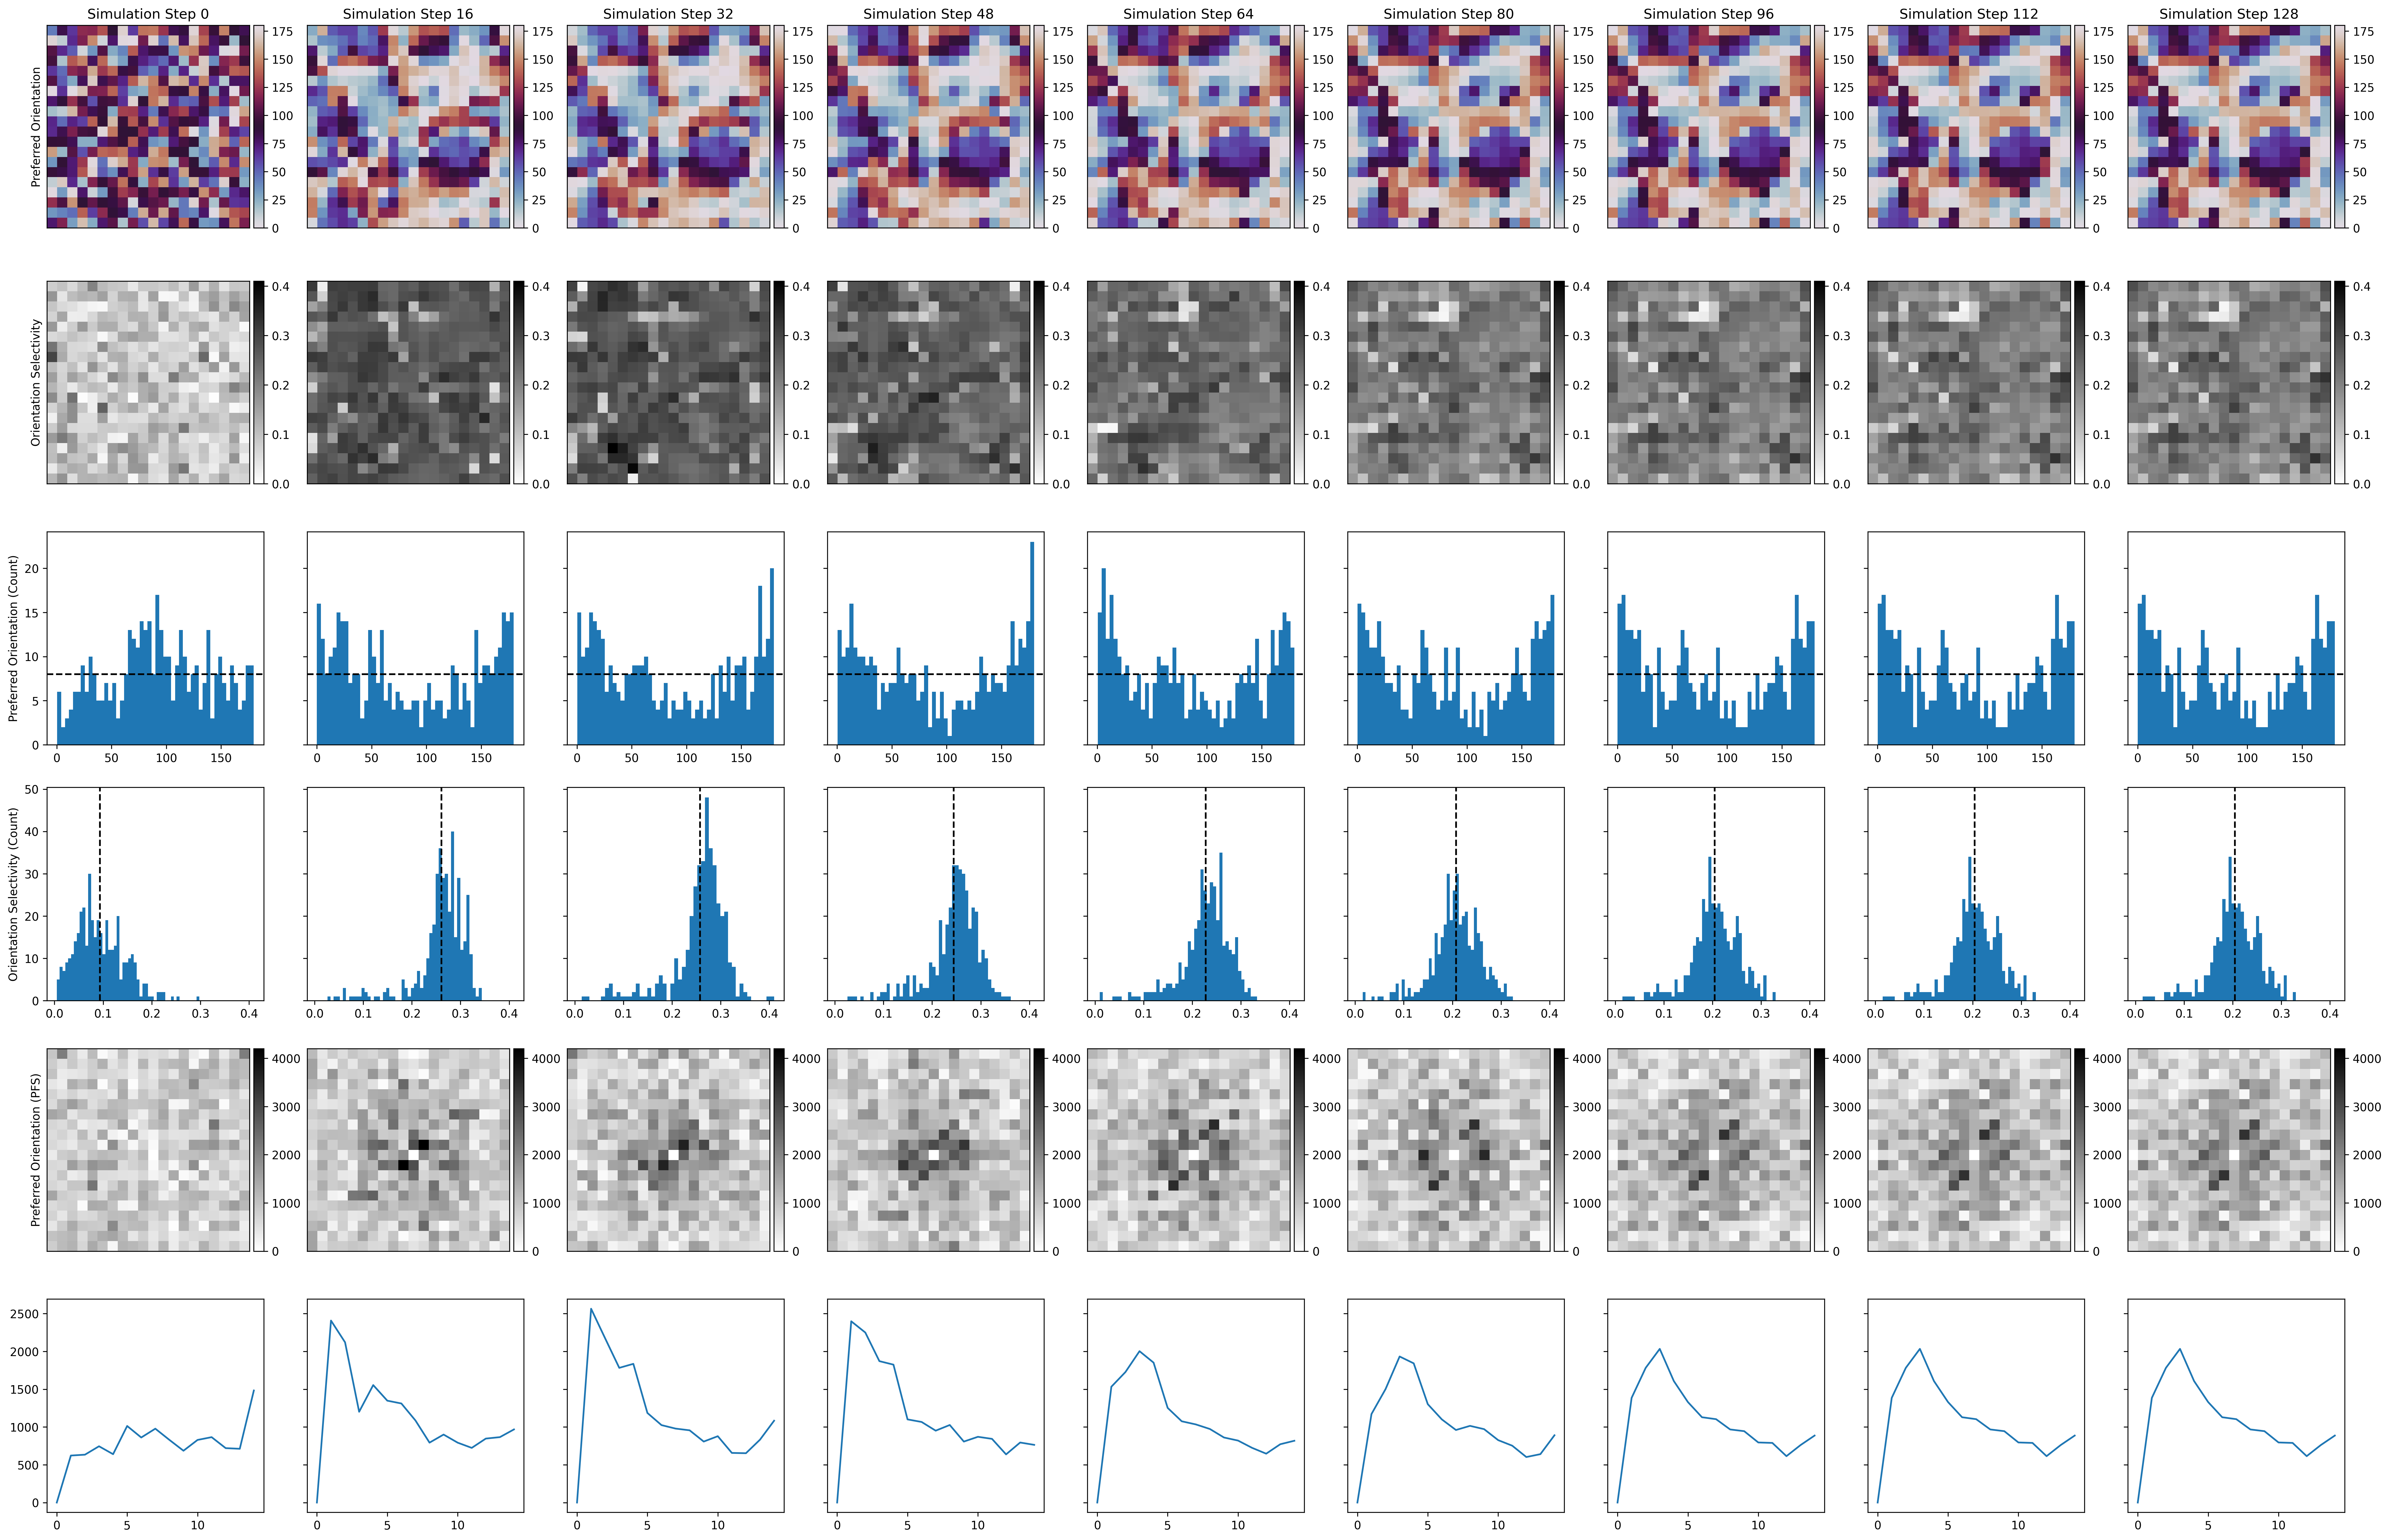

In [45]:
def get_ori_sel(opm,calc_fft=True):
    sel = np.abs(opm)
    ori = np.angle(opm)/2
    ori = ori - (np.sign(ori)-1)*0.5*np.pi
    ori *= 180/np.pi
    
    if calc_fft:
        ori_fft = np.abs(np.fft.fftshift(np.fft.fft2(ori - np.nanmean(ori))))
        ori_fps = np.zeros(int(np.ceil(N4//2*np.sqrt(2))))

        grid = np.arange(-N4//2,N4//2)
        x,y = np.meshgrid(grid,grid)
        bin_idxs = np.digitize(np.sqrt(x**2+y**2),np.arange(0,np.ceil(N4//2*np.sqrt(2)))+0.1)
        for idx in range(0,int(np.ceil(N4//2*np.sqrt(2)))):
            ori_fps[idx] = np.mean(ori_fft[bin_idxs == idx])
        
        return ori,sel,ori_fft,ori_fps
    else:
        return ori,sel

Vers = np.arange(0,128+1,16)-1

oris = np.zeros((len(Vers),N4,N4))
sels = np.zeros((len(Vers),N4,N4))
ori_ffts = np.zeros((len(Vers),N4,N4))
ori_fpss = np.zeros((len(Vers),int(np.ceil(N4//2*np.sqrt(2)))))

for idx,Version in enumerate(Vers):
    if Version == -1:
        probe_config_dict = misc.load_external_params("params_"+config_name,False)
        probe_config_dict.update({
                        "RF_mode" : "initialize",
                        "system" : "one_layer",
                        "Version" : Version,
                        })
        net = network.Network(Version,probe_config_dict,verbose=False)
    else:
        load_location = 'local'
        load_path = data_dir + "layer4/{s}/v{v}/".format(config_name,v=Version)
        probe_config_dict = pickle.load(open(load_path + "config_v{v}.p".format(v=Version),"rb"))
        probe_config_dict["Wlgn_to4_params"].update({
            "W_mode": "load_from_external",
            "load_from_prev_run" : Version})
        net = network.Network(Version,probe_config_dict,load_location=load_location,verbose=False)

    _,Wlgn_to_4,arbor_on,arbor_off,arbor2,_,W4to4 = net.system
#     for i in range(20):
#         norm = tf.reduce_sum(Wlgn_to_4,axis=(0,2))
#         norm = tf.where(tf.equal(norm, 0), tf.ones_like(norm), norm)
#         Wlgn_to_4 /= norm[None,:,None]
#         norm = tf.reduce_sum(Wlgn_to_4,axis=1)
#         norm = tf.where(tf.equal(norm, 0), tf.ones_like(norm), norm)
#         Wlgn_to_4 /= norm[:,None,:]
#         Wlgn_to_4 = tf.clip_by_value(Wlgn_to_4,0,2*arbor2)
    Wlgn_to_4 = np.array(Wlgn_to_4).reshape((2,2,400,400))
    Wlgn_to_4 = Wlgn_to_4.transpose((0,1,3,2))

    sd = Wlgn_to_4[:,0,...] - Wlgn_to_4[:,1,...]
    sd = sd.reshape((2,20,20,20,20))
    rA = int(config_dict["Wlgn_to4_params"]["r_A_on"] * N4)
    DA = 2*rA + 5
    opm,Rn = analysis_tools.get_response(sd[0],DA)
    
    oris[idx],sels[idx],ori_ffts[idx],ori_fpss[idx] = get_ori_sel(opm)

fig,axs = plt.subplots(6,len(Vers),figsize=(4*len(Vers),4*6),dpi=300,sharex='row',sharey='row')
for i,Version in enumerate(Vers):
    imshowbar(fig,axs[0,i],oris[i],cmap='twilight',vmin=0,vmax=180)
    imshowbar(fig,axs[1,i],sels[i],cmap='binary',vmin=0,vmax=np.max(sels))
    nbin = 50
    axs[2,i].hist(oris[i].flatten(),nbin)
    axs[2,i].axhline(N4*N4/nbin,color='k',ls='--')
    axs[3,i].hist(sels[i].flatten(),nbin)
    axs[3,i].axvline(np.mean(sels[i].flatten()),color='k',ls='--')
    
    imshowbar(fig,axs[4,i],ori_ffts[i],cmap='binary',vmin=0,vmax=np.max(ori_ffts))
    axs[5,i].plot(np.arange(0,np.ceil(N4//2*np.sqrt(2))),ori_fpss[i])
    
    axs[0,i].set_title('Simulation Step {:d}'.format(Version+1))
    
axs[0,0].set_ylabel('Preferred Orientation')
axs[1,0].set_ylabel('Orientation Selectivity')
axs[2,0].set_ylabel('Preferred Orientation (Count)')
axs[3,0].set_ylabel('Orientation Selectivity (Count)')
axs[4,0].set_ylabel('Preferred Orientation (DFT)')
axs[4,0].set_ylabel('Preferred Orientation (PFS)')